# Problem Statement

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

Dataset Description
Variable		Definition
employee_id		Unique ID for employee
department		Department of employee
region			Region of employment (unordered)
education		Education Level
gender			Gender of Employee
recruitment_channel	Channel of recruitment for employee
no_of_trainings		no of other trainings completed in previous year on soft skills, technical skills etc.
age			Age of Employee
previous_year_rating	Employee Rating for the previous year
length_of_service	Length of service in years
KPIs_met >80%		if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
awards_won?		if awards won during previous year then 1 else 0
avg_training_score	Average score in current training evaluations
is_promoted		(Target) Recommended for promotion



Evaluation Metric
The evaluation metric for this competition is F1 Score.

 

Public and Private Split
Test data is further randomly divided into Public (40%) and Private (60%) data.

Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the competition is over.

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

# import missingno as mno
from sklearn.linear_model import LogisticRegression
%matplotlib inline


In [2]:
train = pd.read_csv('train_hranalytics.csv')
test = pd.read_csv('test_hranalytics.csv')

In [3]:
train['is_promoted']=train.is_promoted.astype(int)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int32
dtypes: float64(1), int32(1), int64(7), object(5)
memory usage: 5.6+ MB


In [5]:
test['is_promoted']=np.nan
df=train.append(test)

In [6]:
train.isna().sum()
test.isna().sum()

employee_id                 0
department                  0
region                      0
education                1034
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1812
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

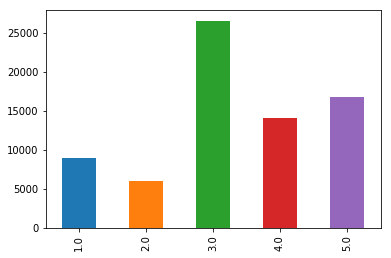

In [7]:
df['previous_year_rating'].value_counts().sort_index().plot.bar()

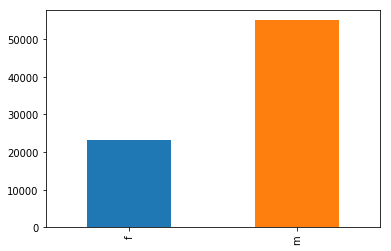

In [8]:
df['gender'].value_counts().sort_index().head(20).plot.bar()

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


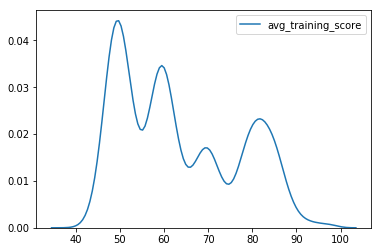

In [9]:
sns.kdeplot(df['avg_training_score'])

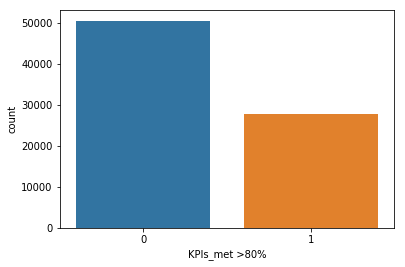

In [10]:
sns.countplot(df['KPIs_met >80%'])

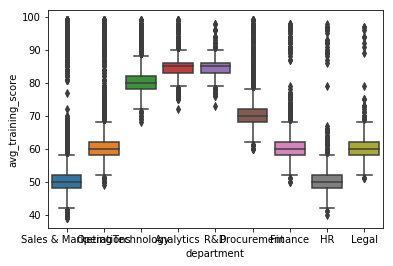

In [11]:
sns.boxplot(x='department',y='avg_training_score',data=df)

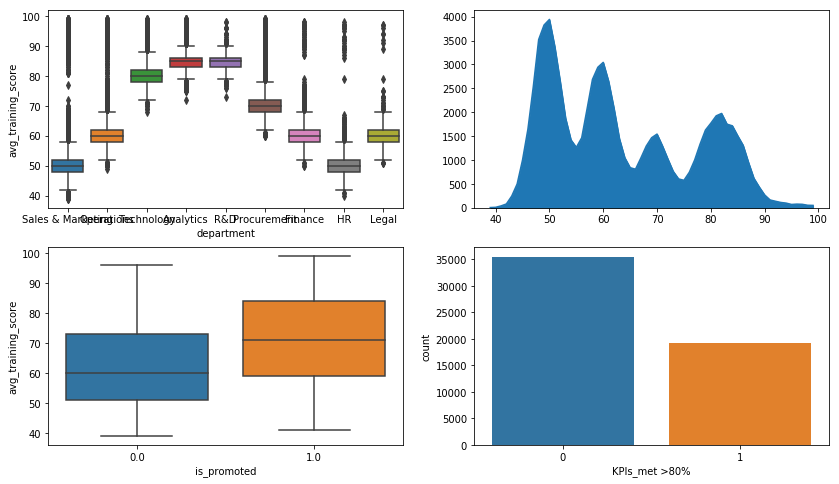

In [12]:
##can assign the each chart to one axes at a time
fig,axrr=plt.subplots(2,2,figsize=(14,8))

sns.boxplot(x='department',y='avg_training_score',data=df,ax=axrr[0][0])

# reviews['points'].value_counts().sort_index().plot.bar(ax=axrr[0][0])
# axrr[0][0].set_title('wine score',fontsize=18)

df['avg_training_score'].value_counts().sort_index()[:1000].plot.area(ax=axrr[0][1])
# sns.kdeplot(reviews[reviews['price'] < 200]['price'],ax=axrr[0][1])
# axrr[0][1].set_title('Price under 200',fontsize=18)

sns.boxplot(x='is_promoted',y='avg_training_score',data=df,ax=axrr[1][0])
# sns.countplot(reviews['points'],ax=axrr[1][0])

sns.countplot(train['KPIs_met >80%'],ax=axrr[1][1])
# reviews['province'].value_counts().head(20).plot.bar(ax=axrr[1][1])

In [13]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [14]:
# df['gender'].loc[df['gender']=='f'] = 0
# df['gender'].loc[df['gender']=='m'] = 1
df.gender = pd.DataFrame(np.where(df.gender=="m",1,0))

In [15]:
df.corr()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.000265,-0.005216,0.000586,0.001372,0.004420,0.000127,0.005943,-0.003930,0.001206
gender,-0.000265,1.000000,0.061552,-0.010355,-0.015857,-0.013185,-0.022939,0.002449,-0.017467,-0.011109
no_of_trainings,-0.005216,0.061552,1.000000,-0.082536,-0.058439,-0.058403,-0.043912,-0.004818,0.044180,-0.024896
age,0.000586,-0.010355,-0.082536,1.000000,0.009137,0.653339,-0.026223,-0.007357,-0.044592,-0.017166
previous_year_rating,0.001372,-0.015857,-0.058439,0.009137,1.000000,0.001063,0.350921,0.027636,0.071813,0.159320
length_of_service,0.004420,-0.013185,-0.058403,0.653339,0.001063,1.000000,-0.077854,-0.040556,-0.035272,-0.010670
KPIs_met >80%,0.000127,-0.022939,-0.043912,-0.026223,0.350921,-0.077854,1.000000,0.100365,0.076729,0.221582
awards_won?,0.005943,0.002449,-0.004818,-0.007357,0.027636,-0.040556,0.100365,1.000000,0.072655,0.195871
avg_training_score,-0.003930,-0.017467,0.044180,-0.044592,0.071813,-0.035272,0.076729,0.072655,1.000000,0.181147
is_promoted,0.001206,-0.011109,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


In [16]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0.0


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


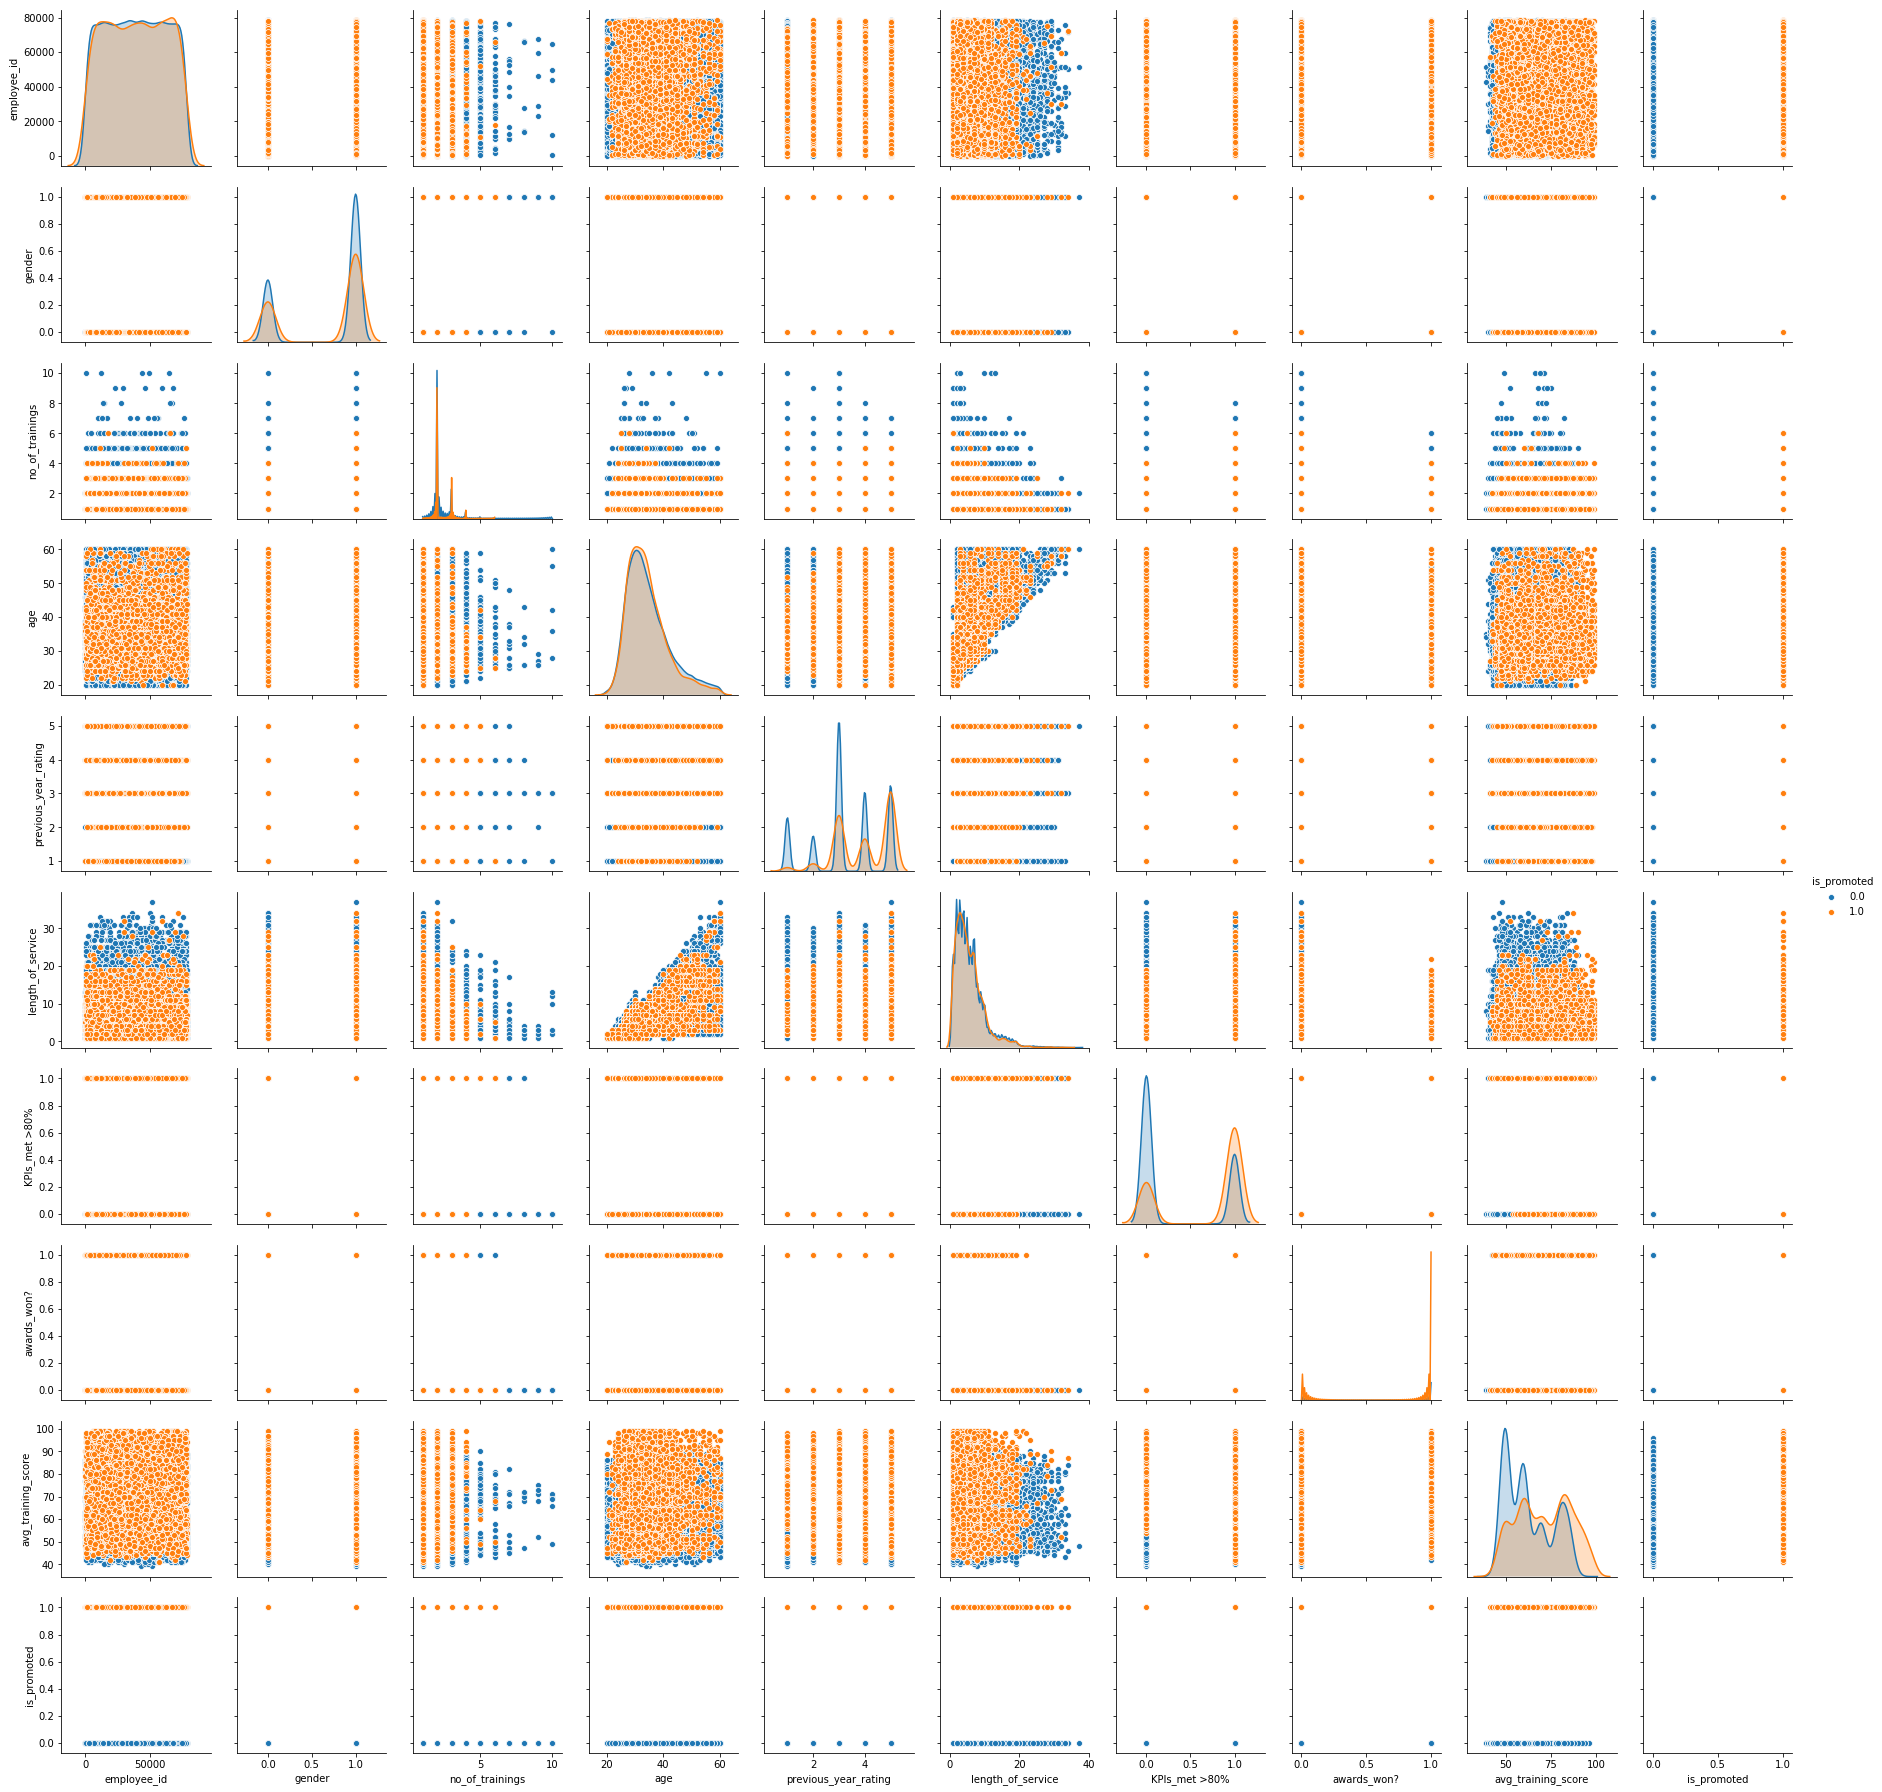

In [17]:
sns.pairplot(data=df, hue = 'is_promoted')

In [18]:
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)

In [19]:
df.corr()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.000265,-0.005216,0.000586,0.001264,0.004420,0.000127,0.005943,-0.003930,0.001206
gender,-0.000265,1.000000,0.061552,-0.010355,-0.015717,-0.013185,-0.022939,0.002449,-0.017467,-0.011109
no_of_trainings,-0.005216,0.061552,1.000000,-0.082536,-0.057310,-0.058403,-0.043912,-0.004818,0.044180,-0.024896
age,0.000586,-0.010355,-0.082536,1.000000,0.030097,0.653339,-0.026223,-0.007357,-0.044592,-0.017166
previous_year_rating,0.001264,-0.015717,-0.057310,0.030097,1.000000,0.024656,0.336612,0.026524,0.068547,0.153230
length_of_service,0.004420,-0.013185,-0.058403,0.653339,0.024656,1.000000,-0.077854,-0.040556,-0.035272,-0.010670
KPIs_met >80%,0.000127,-0.022939,-0.043912,-0.026223,0.336612,-0.077854,1.000000,0.100365,0.076729,0.221582
awards_won?,0.005943,0.002449,-0.004818,-0.007357,0.026524,-0.040556,0.100365,1.000000,0.072655,0.195871
avg_training_score,-0.003930,-0.017467,0.044180,-0.044592,0.068547,-0.035272,0.076729,0.072655,1.000000,0.181147
is_promoted,0.001206,-0.011109,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 14 columns):
employee_id             78298 non-null int64
department              78298 non-null object
region                  78298 non-null object
education               74855 non-null object
gender                  78298 non-null int32
recruitment_channel     78298 non-null object
no_of_trainings         78298 non-null int64
age                     78298 non-null int64
previous_year_rating    78298 non-null float64
length_of_service       78298 non-null int64
KPIs_met >80%           78298 non-null int64
awards_won?             78298 non-null int64
avg_training_score      78298 non-null int64
is_promoted             54808 non-null float64
dtypes: float64(2), int32(1), int64(7), object(4)
memory usage: 11.2+ MB


In [21]:
df['previous_year_rating']=df.previous_year_rating.astype(int)

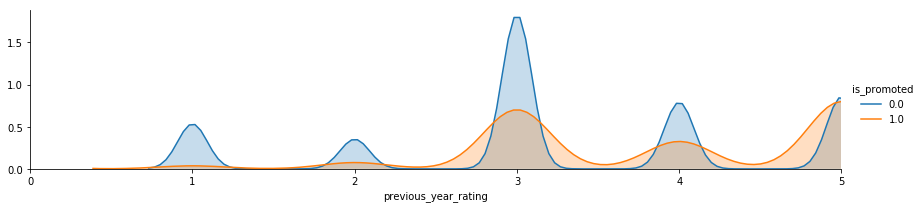

In [22]:
facet = sns.FacetGrid(df, hue="is_promoted",aspect=4)
facet.map(sns.kdeplot,'previous_year_rating',shade= True)
facet.set(xlim=(0, df['previous_year_rating'].max()))
facet.add_legend()
 
plt.show()

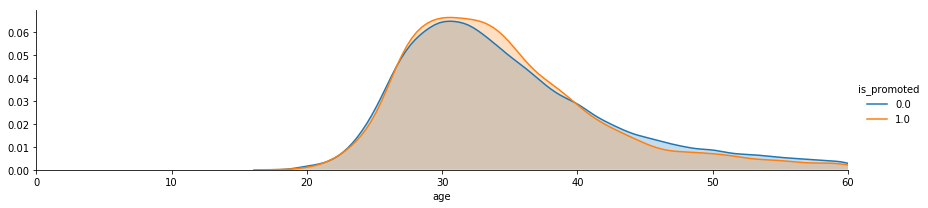

In [23]:
facet = sns.FacetGrid(df, hue="is_promoted",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, df['age'].max()))
facet.add_legend()
 
plt.show()


In [24]:
df = pd.get_dummies(df, dummy_na=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 63 columns):
employee_id                     78298 non-null int64
gender                          78298 non-null int32
no_of_trainings                 78298 non-null int64
age                             78298 non-null int64
previous_year_rating            78298 non-null int32
length_of_service               78298 non-null int64
KPIs_met >80%                   78298 non-null int64
awards_won?                     78298 non-null int64
avg_training_score              78298 non-null int64
is_promoted                     54808 non-null float64
department_Analytics            78298 non-null uint8
department_Finance              78298 non-null uint8
department_HR                   78298 non-null uint8
department_Legal                78298 non-null uint8
department_Operations           78298 non-null uint8
department_Procurement          78298 non-null uint8
department_R&D                  78298 non

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 63 columns):
employee_id                     78298 non-null int64
gender                          78298 non-null int32
no_of_trainings                 78298 non-null int64
age                             78298 non-null int64
previous_year_rating            78298 non-null int32
length_of_service               78298 non-null int64
KPIs_met >80%                   78298 non-null int64
awards_won?                     78298 non-null int64
avg_training_score              78298 non-null int64
is_promoted                     54808 non-null float64
department_Analytics            78298 non-null uint8
department_Finance              78298 non-null uint8
department_HR                   78298 non-null uint8
department_Legal                78298 non-null uint8
department_Operations           78298 non-null uint8
department_Procurement          78298 non-null uint8
department_R&D                  78298 non

In [28]:
train = df[df.is_promoted.isna()==False]
test = df[df.is_promoted.isna()==True]

In [29]:
x_train = train.drop(['is_promoted'],axis=1)
x_test = test.drop(['is_promoted'],axis=1)
y_train = train['is_promoted']
y_test = test['is_promoted']

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(54808, 62)
(23490, 62)
(54808,)
(23490,)


In [31]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [32]:
y_pred = lr.predict(x_train)

In [33]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train,y_pred)

array([[38281, 11859],
       [  836,  3832]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix
accuracy = accuracy_score(y_train,y_pred)
f1_score = f1_score(y_train,y_pred)
precision = precision_score(y_train,y_pred)
recall = recall_score(y_train,y_pred)
roc_auc = roc_auc_score(y_train,y_pred)

print('Accuracy:',accuracy)
print('F1 Score:',f1_score)
print('Precision:',precision)
print('Recall:',recall)
print('ROC Area Under Curve',roc_auc)

Accuracy: 0.7683732301853744
F1 Score: 0.37644285082764384
Precision: 0.2442164298005226
Recall: 0.8209083119108826
ROC Area Under Curve 0.7921952808058602


In [35]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [36]:
#KNN
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.9171684  0.91461412 0.91516147 0.91881044 0.91534392 0.91169495
 0.90749863 0.91735085 0.91678832 0.91313869]


In [37]:
#KNN Score
round(np.mean(score)*100, 2)

91.48

In [38]:
#Decision Tree
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.90384966 0.90020069 0.90001824 0.90129538 0.89764641 0.90403211
 0.90020069 0.90111294 0.89762774 0.89781022]


In [39]:
# Decision Tree Score
round(np.mean(score)*100, 2)

90.04

In [40]:
# Random Forest
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.93632549 0.93048714 0.93413611 0.93395366 0.93267652 0.92720307
 0.92610837 0.93285897 0.93120438 0.92737226]


In [41]:
# Random Forest Score
round(np.mean(score)*100, 2)

93.12

In [42]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0

In [43]:
#K-nearest (k-NN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

92.51

In [44]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [45]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0

In [54]:
submission = pd.DataFrame({
        "employee_id": test["employee_id"],
        "is_promoted": y_pred
    })
submission.to_csv('./submission.csv', index=False)

In [55]:
submission['is_promoted'].value_counts()

0    22921
1      569
Name: is_promoted, dtype: int64

In [56]:
submission = pd.read_csv('submission.csv')